# Species Segmentation with Cluster Analysis

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [3]:
data = pd.read_csv("iris-dataset.csv")
data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Plot the data

Text(0, 0.5, 'Sepal width')

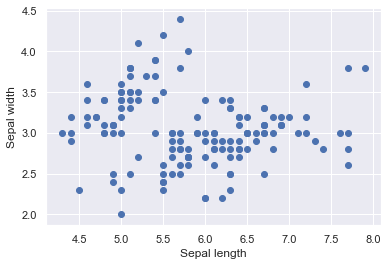

In [5]:
plt.scatter(data["sepal_length"], data["sepal_width"])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Clustering (unscaled data)

In [9]:
x = data.iloc[:,0:2]
x

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [10]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
data["cluster"]=kmeans.fit_predict(x)
data

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


Text(0, 0.5, 'Sepal width')

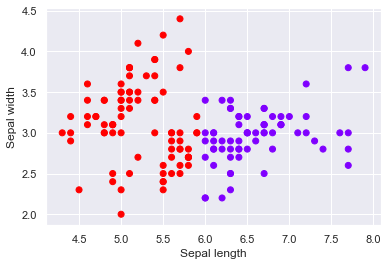

In [12]:
plt.scatter(data["sepal_length"], data["sepal_width"], c =data["cluster"], cmap="rainbow" )
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

# Standardize the variables

In [13]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536],
       [-0.53717756,  1.49486315],
       [-1.26418478,  0.80065426],
       [-1.26418478, -0.1249576 ],
       [-1.87002413, -0.1249576 ],
       [-0.05250608,  2.18907205],
       [-0.17367395,  3.11468391],
       [-0.53717756,  1.95766909],
       [-0.90068117,  1.03205722],
       [-0.17367395,  1.72626612],
       [-0.90068117,  1.72626612],
       [-0.53717756,  0.80065426],
       [-0.90068117,  1.49486315],
       [-1.50652052,  1.26346019],
       [-0.90068117,  0.56925129],
       [-1.26418478,  0.80065426],
       [-1.02184904, -0.1249576 ],
       [-1.02184904,  0.80065426],
       [-0.7795133 ,  1.03205722],
       [-0.7795133 ,

# Clustering (scaled data)

In [14]:
kmeans = KMeans(2)
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [15]:
data["cluster"]=kmeans.fit_predict(x_scaled)
data

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


Text(0, 0.5, 'Sepal width')

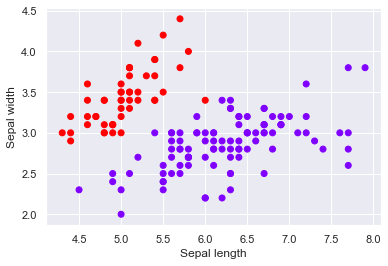

In [16]:
plt.scatter(data["sepal_length"], data["sepal_width"], c =data["cluster"], cmap="rainbow" )
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

## Elbow Method

### WCSS

In [19]:
wcss =[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[300.0,
 168.39262198361087,
 103.78443895265738,
 79.71916925065548,
 61.70659834761936,
 52.13495128482427,
 45.364706029652126,
 36.64135486902715,
 31.42552743236277]

### The Elbow Method

Text(0, 0.5, 'WCSS')

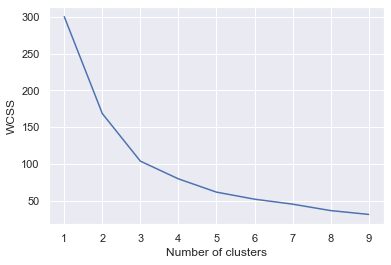

In [20]:
plt.plot(range(1,10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")